In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
test_data = pd.read_csv('../data/gemstone/test.csv')
train_data = pd.read_csv('../data/gemstone/train.csv')

In [9]:
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [35]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

X = pd.get_dummies(train_data[features]).values
y = train_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

X_test_data = pd.get_dummies(test_data[features]).values

In [38]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9)
model.fit(X, y)
y_pred = model.predict(X_test_data)

output = pd.DataFrame({'id': test_data.id, 'price': y_pred})
output.to_csv('submissions/gemstone/submissionKNN.csv', index=False)   
print("Your submission was successfully saved!")


# Evaluation
from sklearn import metrics
# print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))

Your submission was successfully saved!


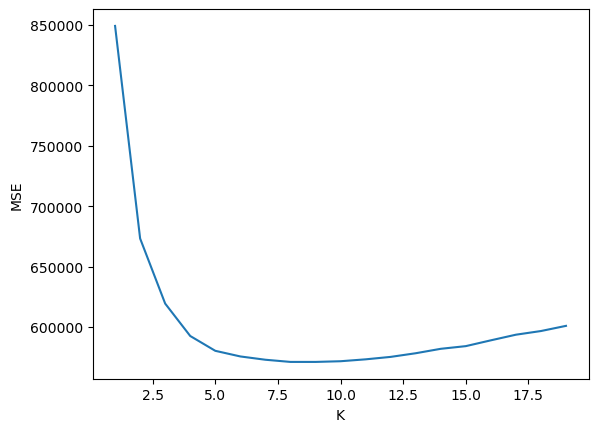

In [31]:
Ks = 20
mse = []

for n in range(1,Ks):
    model = KNeighborsRegressor(n_neighbors = n).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test, y_pred))

# decrease y axis
plt.plot(range(1,Ks),mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [33]:
# print the best K
print("Best K is", mse.index(min(mse))+1)

Best K is 9
